# Using data from our final product
### Written by Minh Phan

The first five notebooks demonstrates the process of obtaining and combining data into our final dataset product that we use to feed in our machine learning models. This tutorial, therefore, serves to guide you through some of the fundamental functions you may use while exploring the data.

This tutorial utilizes the [Xarray](https://docs.xarray.dev/en/stable/) library. You can also use the [Zarr](https://zarr.readthedocs.io/en/stable/) library which is specialized in handling this type of dataset. Xarray is more well-known in the Python developer community, hence the preference. It also seamlessly handles conversion with other popular data libraries like Pandas, NumPy, and Dask.

## Import necessary libraries

In [1]:
! pip install cmocean

  Using cached cmocean-3.0.3-py3-none-any.whl (222 kB)


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot.xarray

## Read data

In [4]:
# Change the file path accordingly
ds = xr.open_zarr('../data/FINAL_IO_025GRID_DAILY.zarr/')

# unsorted time, will fix it later
ds = ds.sortby('time')

In [4]:
ds

<xarray.Dataset>
Dimensions:          (time: 8523, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1997-09-01 1997-09-02 ... 2020-12-31
Data variables: (12/14)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    ...               ...
    u_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

We can slice data by the dimensions (latitude, longitude, time) and data variables. 

In [5]:
# slice by latitude
# notice how we specify the range in reverse
ds.sel(lat=slice(0, -12))

<xarray.Dataset>
Dimensions:          (time: 8523, lat: 49, lon: 241)
Coordinates:
  * lat              (lat) float32 0.0 -0.25 -0.5 -0.75 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1997-09-01 1997-09-02 ... 2020-12-31
Data variables: (12/14)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    ...               ...
    u_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 49, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [6]:
# slice by longitude
ds.sel(lon=slice(42, 45))

<xarray.Dataset>
Dimensions:          (time: 8523, lat: 177, lon: 13)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 44.5 44.75 45.0
  * time             (time) datetime64[ns] 1997-09-01 1997-09-02 ... 2020-12-31
Data variables: (12/14)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    ...               ...
    u_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(29, 177, 13), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [7]:
# slice by time
ds.sel(time=slice('1998', '1999'))

<xarray.Dataset>
Dimensions:          (time: 730, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1999-12-31
Data variables: (12/14)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    direction        (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    sla              (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    ...               ...
    u_curr           (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    u_wind           (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(7, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [8]:
# slice by variable
ds[['u_curr', 'u_wind']]

<xarray.Dataset>
Dimensions:  (time: 8523, lat: 177, lon: 241)
Coordinates:
  * lat      (lat) float32 32.0 31.75 31.5 31.25 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 ... 101.2 101.5 101.8 102.0
  * time     (time) datetime64[ns] 1997-09-01 1997-09-02 ... 2020-12-31
Data variables:
    u_curr   (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 dask.array<chunksize=(29, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [9]:
# combine multiple slicing options all at once
ds[['u_curr', 'u_wind']].sel(time=slice('1998', '1999'), 
                             lat=slice(0, -12), 
                             lon=slice(42, 45))

<xarray.Dataset>
Dimensions:  (time: 730, lat: 49, lon: 13)
Coordinates:
  * lat      (lat) float32 0.0 -0.25 -0.5 -0.75 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 43.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1999-12-31
Data variables:
    u_curr   (time, lat, lon) float32 dask.array<chunksize=(7, 49, 13), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 dask.array<chunksize=(7, 49, 13), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-07
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     OSCAR, ERA5 Reanalysis, Copernicus Climate Ch...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2020-12-31T23:59:59
    time_coverage_start:        2000-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

## Graphing data (basics)

We can also graph the data right from slicing, especially heatmaps from 2D arrays, or line charts. This is especially useful when we want to inspect elements on the go.

In [10]:
# make sure that the array you slice for a heatmap visualization is a 2D array
heatmap_arr = ds['speed'].sel(time='2000-01-02')
heatmap_arr

<xarray.DataArray 'speed' (lat: 177, lon: 241)>
dask.array<getitem, shape=(177, 241), dtype=float32, chunksize=(177, 241), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.0 31.75 31.5 31.25 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 ... 101.2 101.5 101.8 102.0
    time     datetime64[ns] 2000-01-02
Attributes:
    long_name:  10 metre absolute speed
    units:      m s**-1

### 2D array graphing with matplotlib
By default, graphing arrays with Xarray is done using [matplotlib](https://docs.xarray.dev/en/stable/user-guide/plotting.html).

For 2D arrays we have multiple options to choose for our graphs

#### Heatmaps

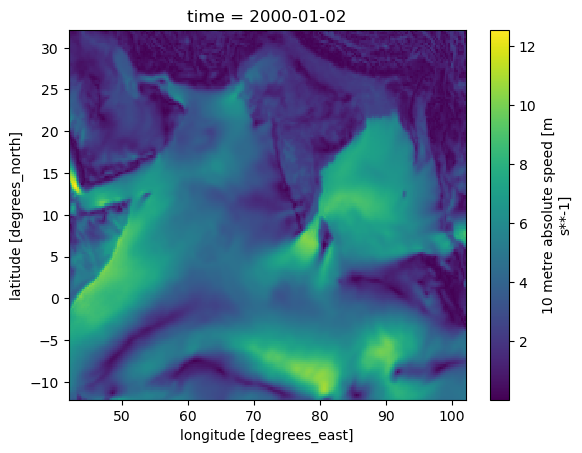

In [11]:
heatmap_arr.plot.imshow()

#### Contour maps

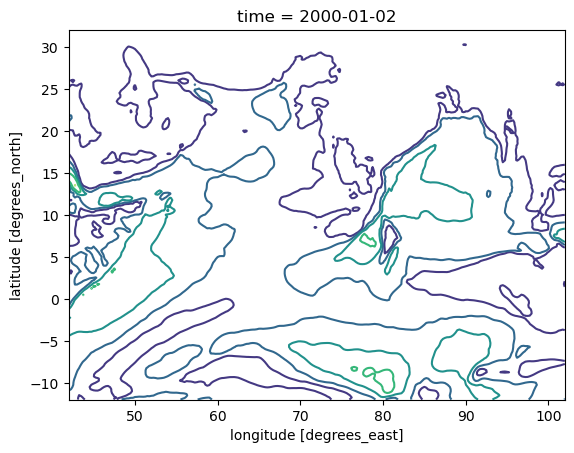

In [12]:
# contour map with no filling
heatmap_arr.plot.contour()

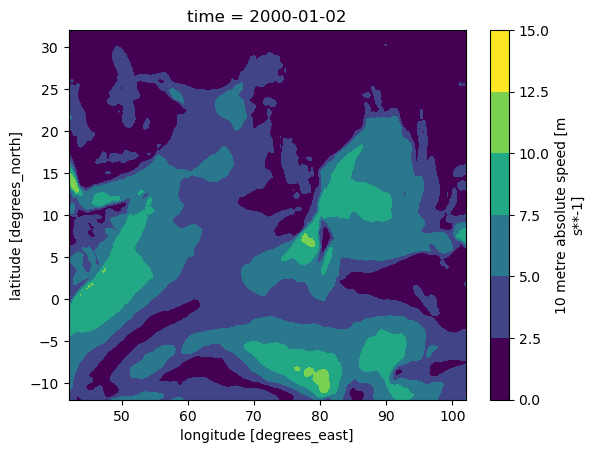

In [13]:
# contour map with color filling
heatmap_arr.plot.contourf()

#### Surface plot

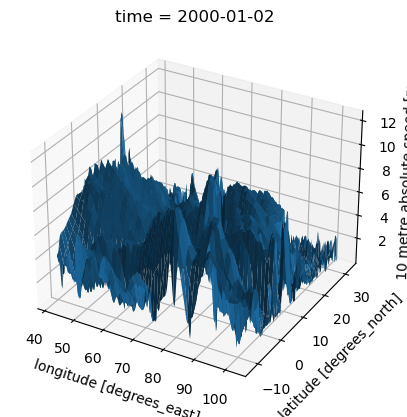

In [14]:
heatmap_arr.plot.surface()

### 1D array graphing with Matplotlib

We can also plot line graphs if our data is presented in 1D arrays. For the example below, we average our wind speed over the whole area and plot it over time. Matplotlib automatically infers what graph to create if you don't explicitly call which one to. This piece of code below is a demonstration:

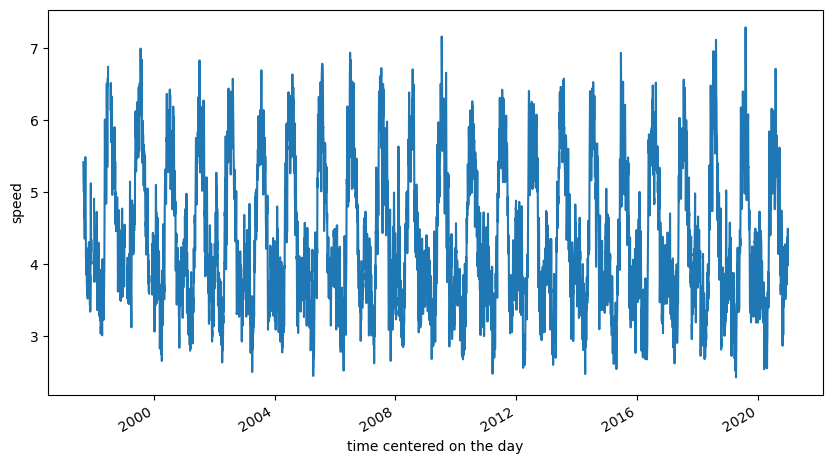

In [15]:
ds['speed'].mean(dim=['lat', 'lon']).plot(figsize=(10, 5))

We can add in parameters to customize our graphs, as additional arguments are passed to the underlying matplotlib `plot()` function.

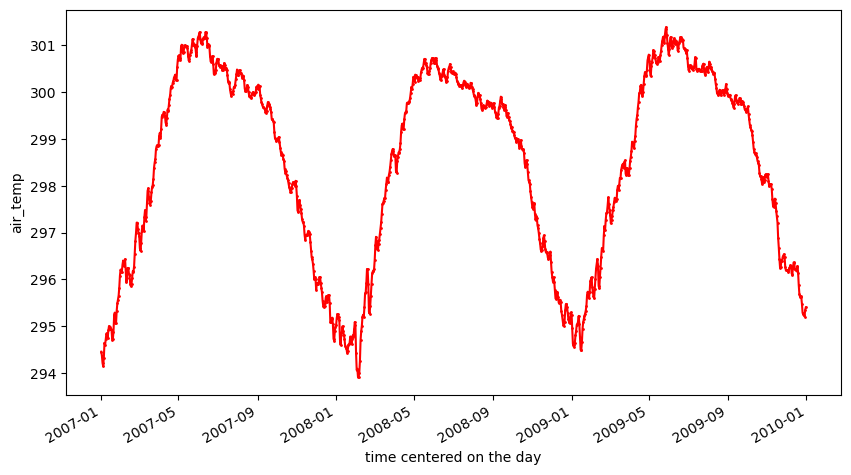

In [16]:
ds['air_temp'].mean(dim=['lat', 'lon']).sel(time=slice('2007', '2009')).plot.line('r-o', figsize=(10,5), markersize=1)

Text(0.5, 1.0, 'Daily average wind direction distribution over covered area (1979-2022)')

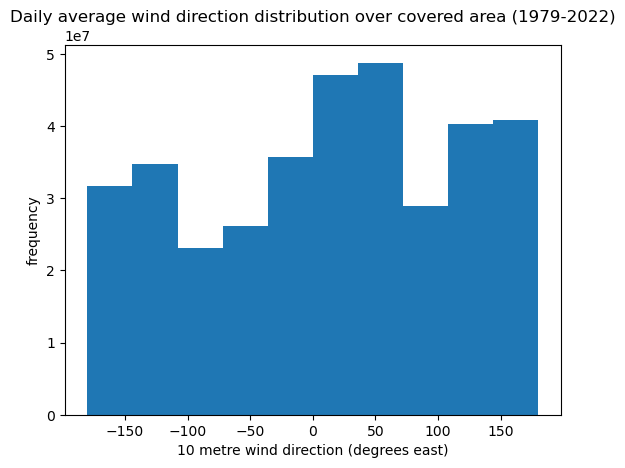

In [18]:
# creating a new Axe object if there is no currently
# available one
ax = plt.gca() 
ds['direction'].plot.hist(ax = ax)
ax.set_xlabel('10 metre wind direction (degrees east)')
ax.set_ylabel('frequency')
ax.set_title('Daily average wind direction distribution over covered area (1979-2022)')

### Graphing with holoviews
Xarray also support graphing using [holoviews](https://holoviews.org/) if you want interactive visualizations.

In [19]:
# scroll along the axes to stretch the graph
heatmap_arr.hvplot().options(cmap='bgy', width=600, height=500)

:Image   [lon,lat]   (speed)

## Resampling

If your xarray version works just fine with `resample()`, here's the most straightforward way to resample your data temporally. It may take a long while for the data to finish resampling, especially if your dataset is big and your resampling frequency is small.

In [5]:
ds['CHL'].resample(time='1M').mean()

TypeError: __init__() got an unexpected keyword argument 'base'

There are some internal issues with Xarray native `resample()` function, so I decided to use Pandas' equivalent function with the same name, which is also the underlying function that the library itself depends on, to help us perform resampling on our dataset.

In [20]:
# resampling is having issues, so this is a temporary solution using Pandas 
# to perform resampling by month on one range...

# choose a small range just in case overloadding happens...

ds_to_resample = ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80)).to_dataframe()

In [21]:
df_resampled = ds_to_resample.groupby([pd.Grouper(freq='1M', level='time'),
                        pd.Grouper(level='lon'),
                        pd.Grouper(level='lat')]).mean()

In [22]:
ds_resampled = xr.Dataset.from_dataframe(df_resampled)

We can see that after resampling, our time dimension size is reduced from 8523 (days) to 280 (months). Resampling is successful!

In [23]:
# original ds_to_resample object before converting to dataframe
ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80))

<xarray.DataArray 'CHL' (time: 8523, lat: 21, lon: 21)>
dask.array<getitem, shape=(8523, 21, 21), dtype=float32, chunksize=(100, 21, 21), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 10.0 9.75 9.5 9.25 9.0 8.75 ... 6.0 5.75 5.5 5.25 5.0
  * lon      (lon) float32 75.0 75.25 75.5 75.75 76.0 ... 79.25 79.5 79.75 80.0
  * time     (time) datetime64[ns] 1997-09-01 1997-09-02 ... 2020-12-31
Attributes:
    _ChunkSizes:                [1, 256, 256]
    ancillary_variables:        flags CHL_uncertainty
    coverage_content_type:      modelResult
    input_files_reprocessings:  Processors versions: MODIS R2022.0NRT/VIIRSN ...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    type:                       surface
    units:                      milligram m-3
    valid_max:                  1000.0
    valid_min:                  0.0

In [24]:
ds_resampled

<xarray.Dataset>
Dimensions:  (time: 280, lon: 21, lat: 21)
Coordinates:
  * time     (time) datetime64[ns] 1997-09-30 1997-10-31 ... 2020-12-31
  * lon      (lon) float32 75.0 75.25 75.5 75.75 76.0 ... 79.25 79.5 79.75 80.0
  * lat      (lat) float32 5.0 5.25 5.5 5.75 6.0 6.25 ... 9.0 9.25 9.5 9.75 10.0
Data variables:
    CHL      (time, lon, lat) float32 0.1385 0.1499 0.1564 ... 3.708 nan 1.711

... and of course we can graph this data, too!

In [25]:
CHL_month = ds_resampled.mean(dim=['lat', 'lon']).hvplot(label='monthly resampling').options(color='red', )

In [26]:
CHL_day = ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80)).mean(dim=['lat', 'lon']).hvplot(label='daily resampling').options(color='blue')

In [27]:
(CHL_day*CHL_month).options(title='Monthly vs Daily resampling of chlorophyll-a levels', xlabel='year')

:Overlay
   .Curve.Daily_resampling   :Curve   [time]   (CHL)
   .Curve.Monthly_resampling :Curve   [time]   (CHL)

## Topography graphing